function transformation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df= pd.read_csv("C:\\Users\\choud\\Desktop\\jupter_files\\feature_transformation.csv",usecols=['Survived','Age','Fare'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\choud\AppData\Local\Temp\ipykernel_7036\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
x=df.drop(['Survived'],axis=1)
x

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [7]:
y=df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)


C:\Users\choud\AppData\Local\Temp\ipykernel_7036\640697290.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


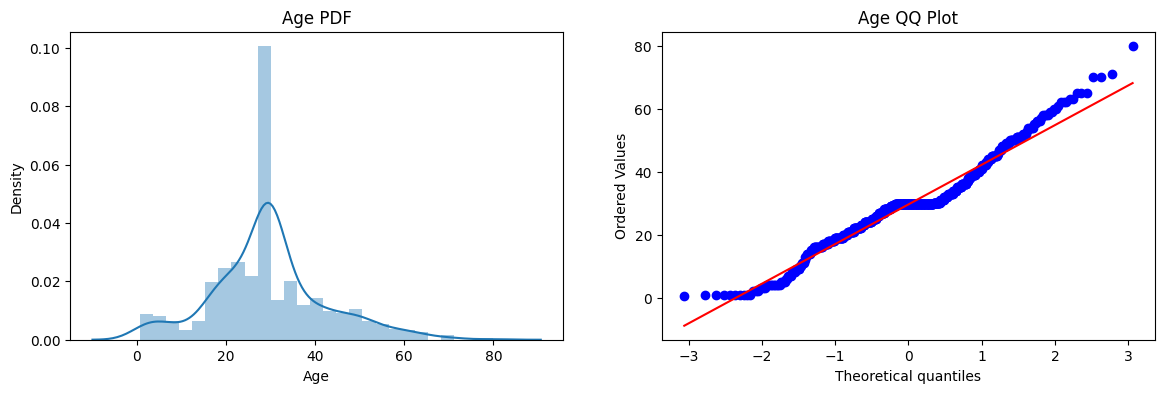

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm', plot=plt)
plt.title("Age QQ Plot")
plt.show()  

C:\Users\choud\AppData\Local\Temp\ipykernel_7036\2766065848.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


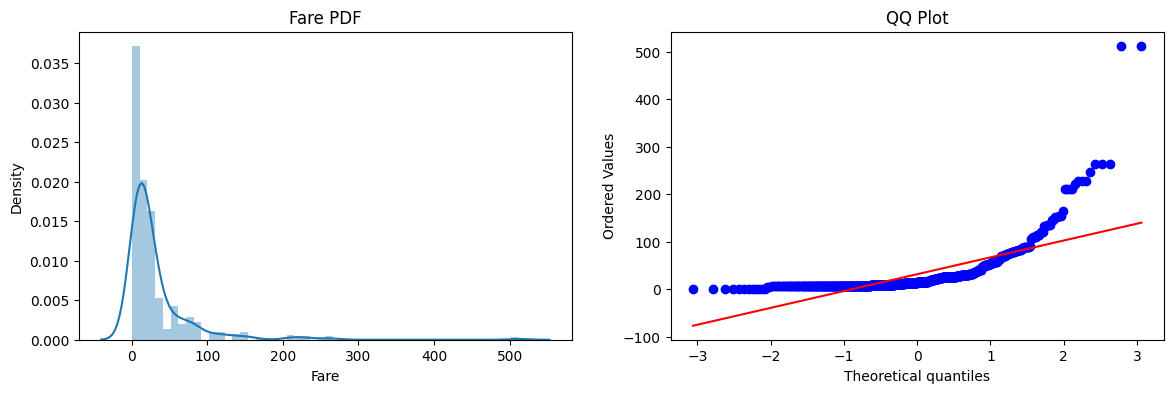

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)

sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title("QQ Plot")
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [14]:
clf.fit(x_train,y_train)


LogisticRegression()

In [15]:
clf2.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
y_predict=clf.predict(x_test)
y_predict2=clf2.predict(x_test)



In [17]:
from sklearn.metrics import accuracy_score
print("Accurecy LR : ", accuracy_score(y_test,y_predict))
print("Accurecy DT : ", accuracy_score(y_test,y_predict2))

Accurecy LR :  0.6753731343283582
Accurecy DT :  0.667910447761194


log tranformation

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

trf1= ColumnTransformer([('log_tranform',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_trans = trf1.fit_transform(x_train)
x_test_trans = trf1.fit_transform(x_test)


In [27]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test_trans)
y_pred2 = clf2.predict(x_test_trans)

print("Accuracy LR : ",accuracy_score(y_test,y_pred))
print("Accuracy DT : ",accuracy_score(y_test,y_pred2))


Accuracy LR :  0.458955223880597
Accuracy DT :  0.5671641791044776


C:\Users\choud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\choud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


 using a function

function transformer

In [20]:
from sklearn.model_selection import cross_val_score
def apply_transform(transform):
    x=df.iloc[:,1:3]
    y=df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    x_trans=trf.fit_transform(x)

    clf=LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,x_trans,y,scoring="accuracy",cv=10)))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(x_train['Fare'],dist='norm',plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(x_trans[:,0],dist='norm',plot=plt)
    plt.title('Fare After Transformation')
    

    plt.show()

    # print(df)
    print(x_trans)

Accuracy 0.6184144818976279


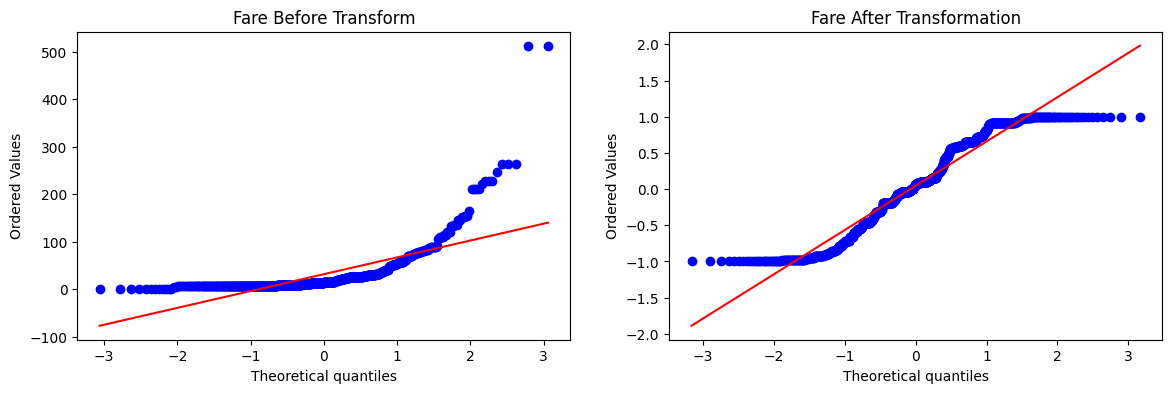

[[ 0.56792417 22.        ]
 [-0.56254868 38.        ]
 [-0.07095868 26.        ]
 ...
 [-0.11171124 29.69911765]
 [ 0.15425145 26.        ]
 [ 0.10379436 32.        ]]


In [21]:
apply_transform(np.cos)

Accuracy 0.616167290886392


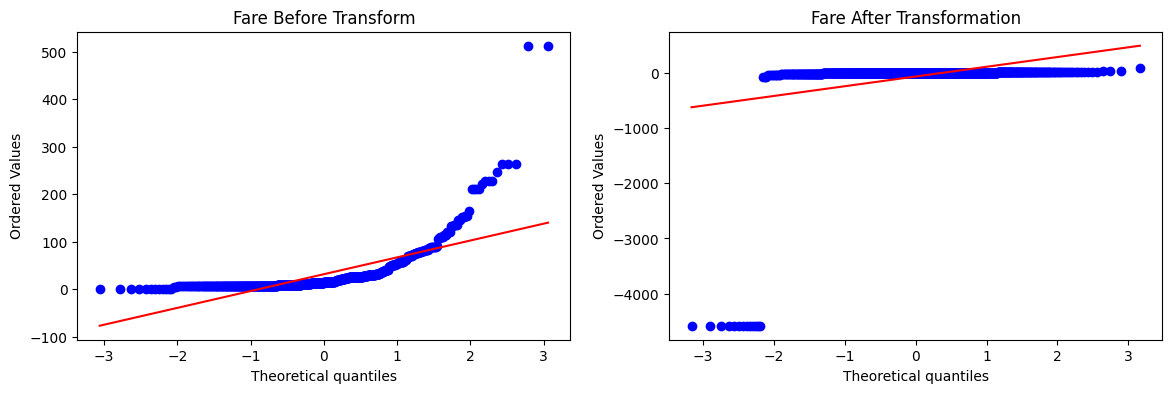

[[  1.44927953  22.        ]
 [ -1.46967577  38.        ]
 [-14.0571839   26.        ]
 ...
 [  8.8956198   29.69911765]
 [ -6.4053312   26.        ]
 [  9.5823974   32.        ]]


In [22]:
apply_transform(np.tan)

Accuracy 0.6195131086142323


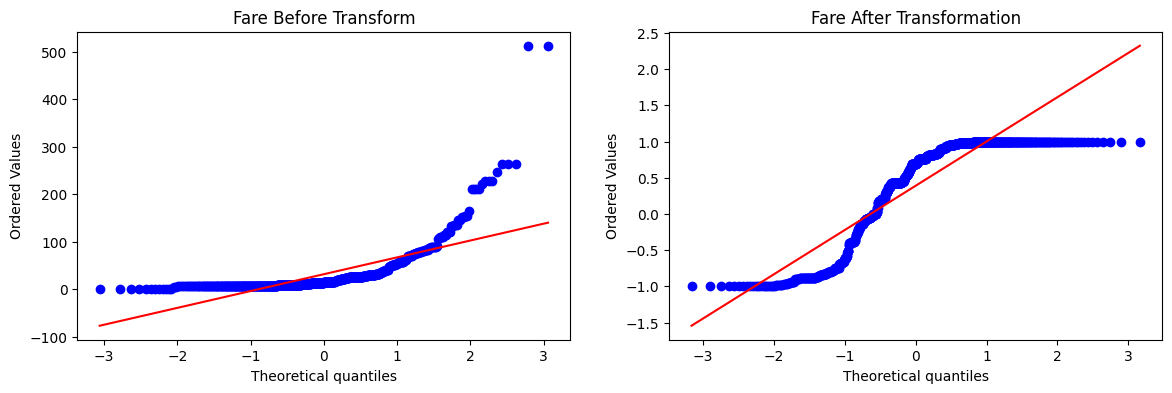

[[ 0.82308088 22.        ]
 [ 0.82676416 38.        ]
 [ 0.99747926 26.        ]
 ...
 [-0.99374071 29.69911765]
 [-0.98803162 26.        ]
 [ 0.99459878 32.        ]]


In [23]:
apply_transform(np.sin)

Accuracy 0.6712609238451936


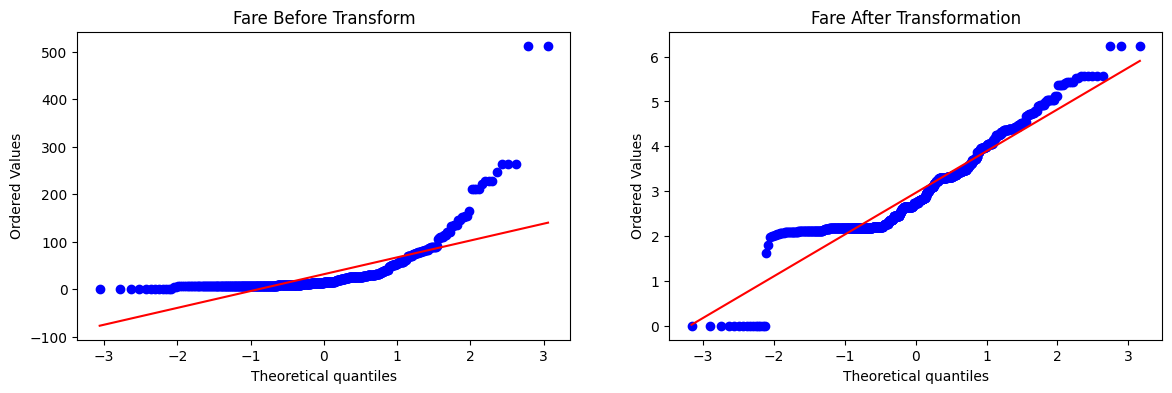

[[ 2.1102132  22.        ]
 [ 4.28059312 38.        ]
 [ 2.18885633 26.        ]
 ...
 [ 3.19663022 29.69911765]
 [ 3.4339872  26.        ]
 [ 2.1690537  32.        ]]


In [24]:
apply_transform(np.log1p)

In [25]:
# print(" x_test  ",x_test_trans,"Y ",y,"Y_train" , y_train ,"y_predict" ,y_predict,"Y_pred",y_pred)